# Module 1 Project: King County House Sales Price Projection

Name: Bonnie Ma

Project goal: build model to predict King County house price and identify significant factors.

#### Follow the OSEMN model process in this project:

-   Obtain
-   Scrub
-   Explore
-   Model
-  Interpret

# I. Obtain the data 


In [198]:
#import libraries and data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import norm
import statsmodels.formula.api as smf
import scipy.stats as stats
from collections import Counter
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.formula.api import ols
%matplotlib inline



In [199]:
kcdata = pd.read_csv("kc_house_data.csv")

In [200]:
kcdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [201]:
kcdata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# II. Data Scrubbing



* Identify and deal with null values appropriately
* Cast columns to the appropriate data types
* Remove unnecessary columns
* Check for and deal with multicollinearity
* Normalize our data

### Deal with missing values

In [202]:
#Identify missing value: waterfront, view, yr_renovated, and incorrect data type: sqft_basement
kcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [203]:
kcdata.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [204]:
#For Categorical data 'Waterfront', replace NAN with mode 0 since it is highly possible that the house doesn't have a waterfront. 
kcdata['waterfront'].value_counts()
kcdata['waterfront'] = kcdata['waterfront'].fillna(0)

counter = Counter()
counter = Counter(kcdata['waterfront'])
print(counter)

Counter({0.0: 21451, 1.0: 146})


For view, this variable presents how many times people have viewed the house. Majority of the values are zero. So we will replace NAN with 0.

In [205]:
kcdata['view'].unique()
kcdata['view'] = kcdata['view'].fillna(0)
counter = Counter()
counter = Counter(kcdata['view'])
print(counter)


Counter({0.0: 19485, 2.0: 957, 3.0: 508, 1.0: 330, 4.0: 317})


In [206]:
#There are many missing values in yr_renovated, we will fill with mode '0'.
%matplotlib inline
kcdata['yr_renovated'].fillna(0)

0           0.0
1        1991.0
2           0.0
3           0.0
4           0.0
5           0.0
6           0.0
7           0.0
8           0.0
9           0.0
10          0.0
11          0.0
12          0.0
13          0.0
14          0.0
15          0.0
16          0.0
17          0.0
18          0.0
19          0.0
20          0.0
21          0.0
22          0.0
23          0.0
24          0.0
25          0.0
26          0.0
27          0.0
28          0.0
29          0.0
          ...  
21567       0.0
21568       0.0
21569       0.0
21570       0.0
21571       0.0
21572       0.0
21573       0.0
21574       0.0
21575       0.0
21576       0.0
21577       0.0
21578       0.0
21579       0.0
21580       0.0
21581       0.0
21582       0.0
21583       0.0
21584       0.0
21585       0.0
21586       0.0
21587       0.0
21588       0.0
21589       0.0
21590       0.0
21591       0.0
21592       0.0
21593       0.0
21594       0.0
21595       0.0
21596       0.0
Name: yr_renovated, Leng

In [207]:
kcdata.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.006760,0.233181,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.081944,0.764673,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [208]:
kcdata.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Cast columns to the appropriate data types

Obvious fix: change date from string to datetime, sqft_basement to continuous, waterfront as categorical

Condition and grade are ordinal variables with limited values. View and Floors have limited values too. Can group them into bins. 

In [209]:
#Convert strings into dates
from datetime import datetime
kcdata['date'].head()
f = lambda x: datetime.strptime(x,'%m/%d/%Y')
kcdata['date']=kcdata['date'].apply(f)
kcdata.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [210]:
#Convert sqft_basement column from string to numerical
kcdata['sqft_basement'].value_counts()

#Replace ? with zeros for now.
kcdata['sqft_basement'] = kcdata['sqft_basement'].replace('?','0')


kcdata['sqft_basement'] = kcdata['sqft_basement'].astype(float)
kcdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null datetime64[ns]
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null float64
view             21597 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: datetime64[ns](1), float64(9), int64(11)
memory usage: 3.5

## III. Data Exploration

From the data dictionary below we can probably tell some are continuous variables (footage of the home/lot/basement/yr_built) and some might be numerical but more like categorical (number of bathrooms/bedrooms, waterfront, view, condition, grade), and other variables we are not sure (zipcode,lat,long). We will visualize them next.

* **id** - unique identified for a house
* **dateDate** - house was sold
* **pricePrice** -  is prediction target
* **bedroomsNumber** -  of Bedrooms/House
* **bathroomsNumber** -  of bathrooms/bedrooms
* **sqft_livingsquare** -  footage of the home
* **sqft_lotsquare** -  footage of the lot
* **floorsTotal** -  floors (levels) in house
* **waterfront** - House which has a view to a waterfront
* **view** - Has been viewed
* **condition** - How good the condition is ( Overall )
* **grade** - overall grade given to the housing unit, based on King County grading system
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

In the following section, we will explore patterns and trends through data visualization.

#### House Price change over Time

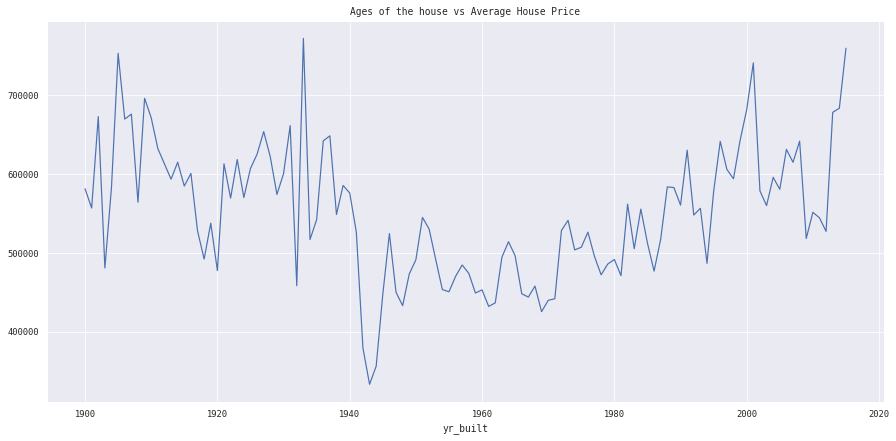

In [211]:
temp = kcdata.groupby(['yr_built']).price.mean()
temp.plot(figsize=(15,7),title='Ages of the house vs Average House Price')
plt.show()

#### Areas with top house price

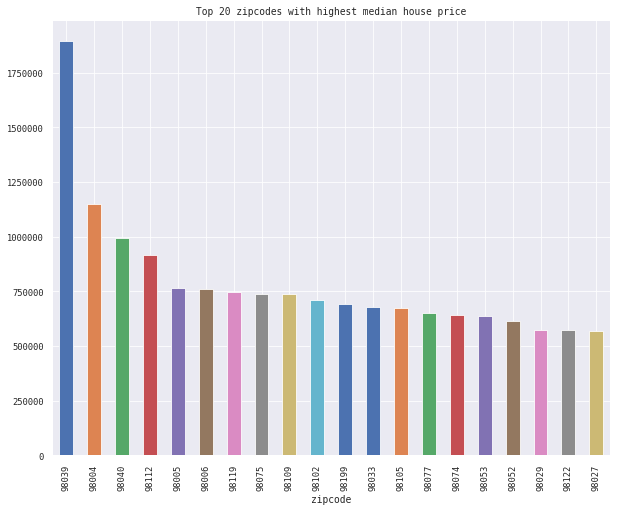

In [212]:
temp = kcdata['price'].groupby([kcdata['zipcode']]).median()
temp = temp.sort_values(ascending=False)[:20]
temp.plot(kind='bar',figsize=(10,8), title='Top 20 zipcodes with highest median house price')
plt.show()

<img src='map.png'>

In [213]:
kcdata['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

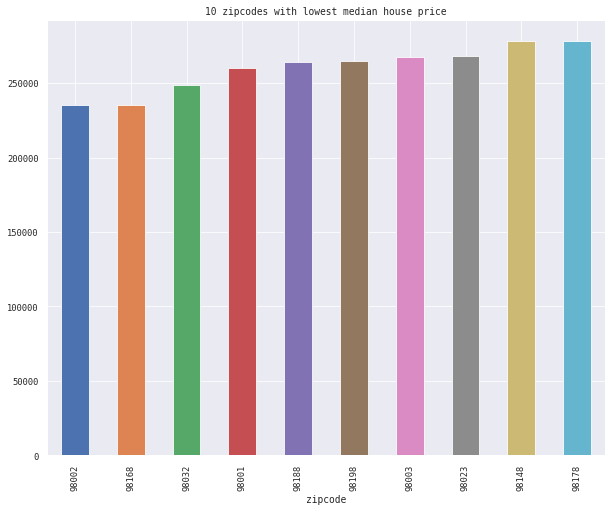

In [214]:
temp = kcdata['price'].groupby([kcdata['zipcode']]).median()
temp = temp.sort_values(ascending=True)[:10]
temp.plot(kind='bar',figsize=(10,8), title='10 zipcodes with lowest median house price')
plt.show()

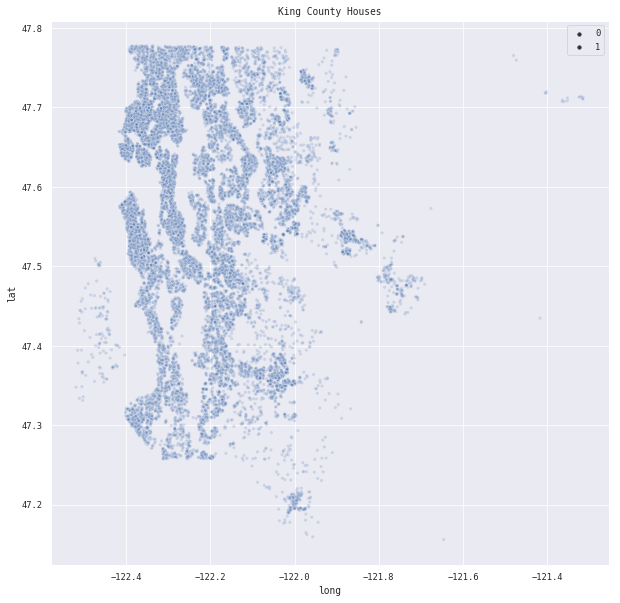

In [215]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='long',y='lat', alpha = 0.2, size=1, color='b', data = kcdata)
plt.title('King County Houses')
plt.legend()
plt.show()

In [216]:
kcdata['price'].groupby([kcdata['zipcode']]).mean();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

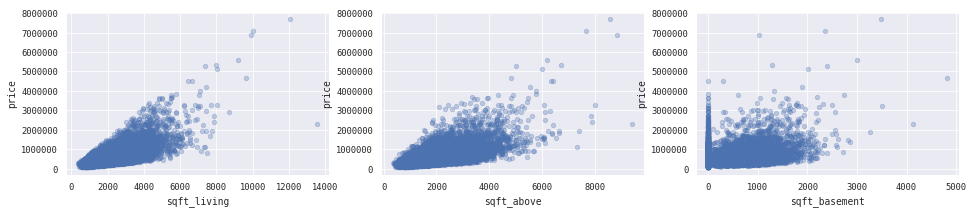

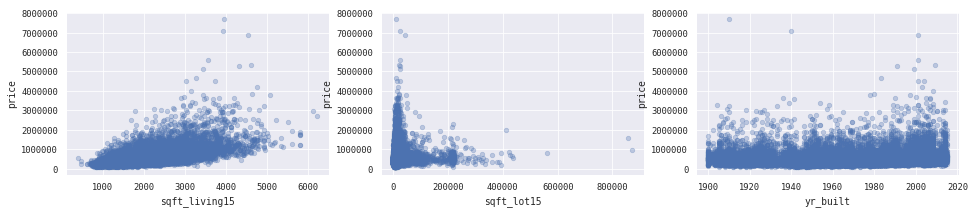

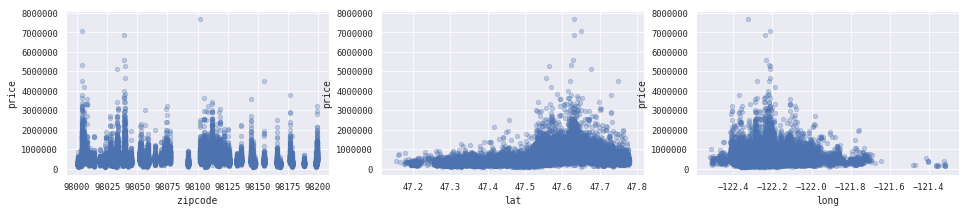

In [217]:
#Plotting potential continuous variables

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))
con_list = ['sqft_living','sqft_above','sqft_basement']

for xcol, ax in zip(con_list, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3)

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))
con_list2 =['sqft_living15','sqft_lot15','yr_built']

for xcol, ax in zip(con_list2, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3)
    
#Plotting zipcode

fig, axes = plt.subplots(nrows=1,ncols=3, figsize=(16,3))
geo_list = ['zipcode','lat','long']

for xcol, ax in zip(geo_list, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3)


Observation: From the scattered plots above, we can tell sqft_living, sqft_above, sqft_living15 have positive correlation with house price, while yr_built and zipcode do not have obvious relationship with house price. Also from the plot, we can tell that the shape of sqft_living and sqft_living15 are similar while sqft_lot and sqft_lot15 are very similar too. So probably these two sets of variables are highly correlated.

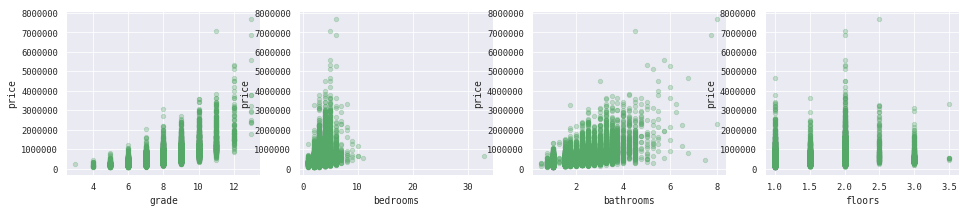

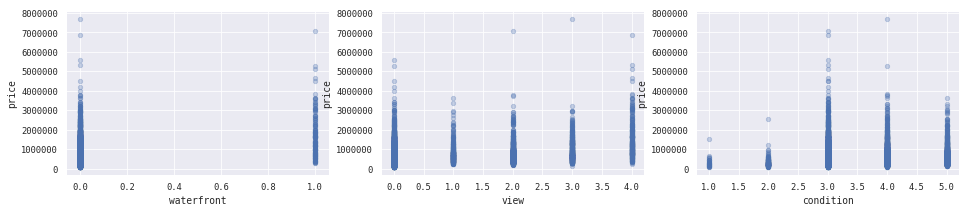

In [218]:
#Plotting other variables. Waterfront is clearly categorical values with binominal values. 
#While view, condition, grade, bedrooms, bathrooms, and floors present actual numerical values so we can either keep them numerical or transform them into categorical values. 

fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,3))
cat_list1 = ['grade','bedrooms', 'bathrooms','floors']


for xcol, ax in zip(cat_list1, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3, color='g')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16,3))    
cat_list2=['waterfront', 'view', 'condition']
for xcol, ax in zip(cat_list2, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3, color='b')

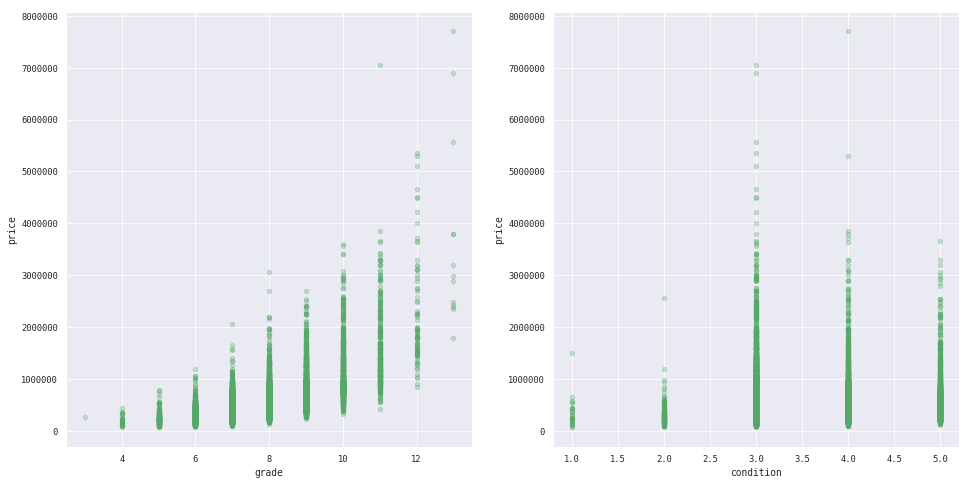

In [219]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,8))
cat_list1 = ['grade','condition']


for xcol, ax in zip(cat_list1, axes):
    kcdata.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.3, color='g')



#### Check impact of waterfront

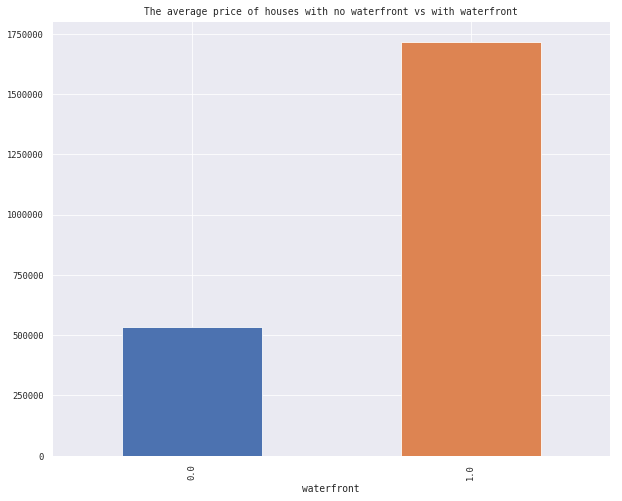

In [220]:
temp = kcdata.groupby(['waterfront']).price.mean()

temp = temp.sort_values(ascending=True)[:10]
temp.plot(kind='bar',figsize=(10,8), title='The average price of houses with no waterfront vs with waterfront')
plt.show()

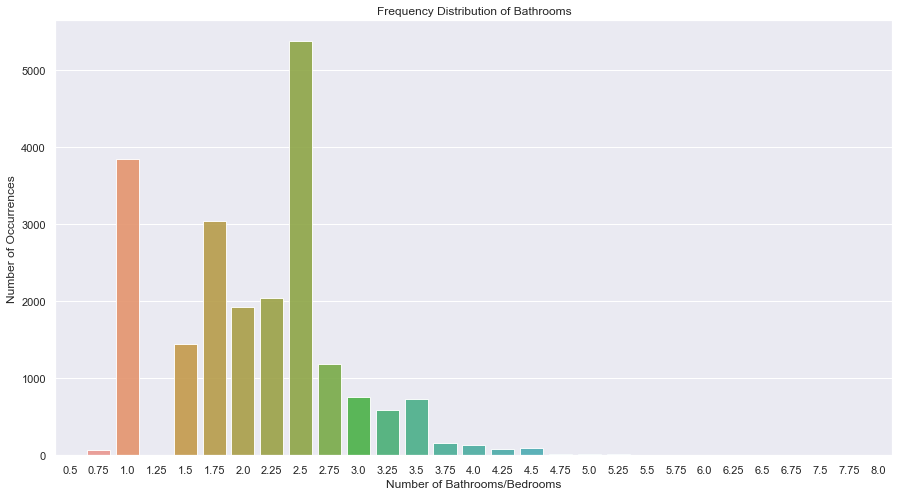

In [221]:
#Value Counts 
#bathroomsNumber - of bathrooms/bedrooms

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
bathroom_count = kcdata['bathrooms'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.barplot(bathroom_count.index, bathroom_count.values, alpha=0.9)

plt.title('Frequency Distribution of Bathrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Bathrooms/Bedrooms', fontsize=12)
plt.show()

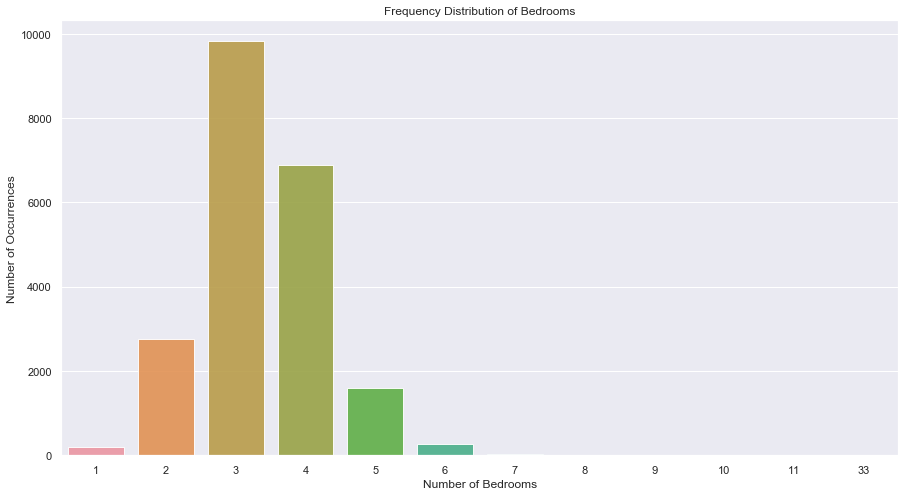

In [222]:
bedroom_count = kcdata['bedrooms'].value_counts()
sns.set(style="darkgrid")
plt.figure(figsize=(15,8))
sns.barplot(bedroom_count.index, bedroom_count.values, alpha=0.9)

plt.title('Frequency Distribution of Bedrooms')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of Bedrooms', fontsize=12)
plt.show()

#### Outliers in Bedroom

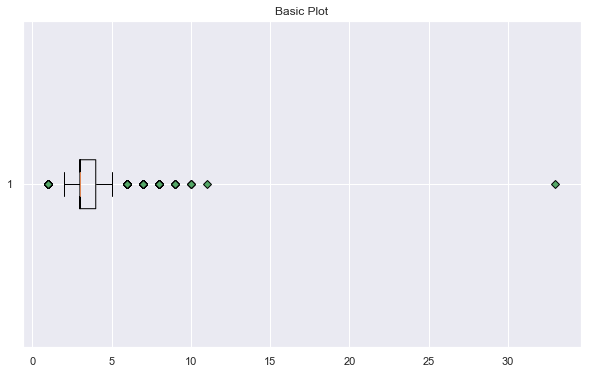

In [223]:
fig1, ax1 = plt.subplots(figsize=(10,6))
green_diamond = dict(markerfacecolor='g', marker='D')
ax1.set_title('Basic Plot')
ax1.boxplot(kcdata['bedrooms'], notch=True, flierprops=green_diamond, vert=False)
plt.show()

We should at least remove the far right point.

## Correlation Matrix

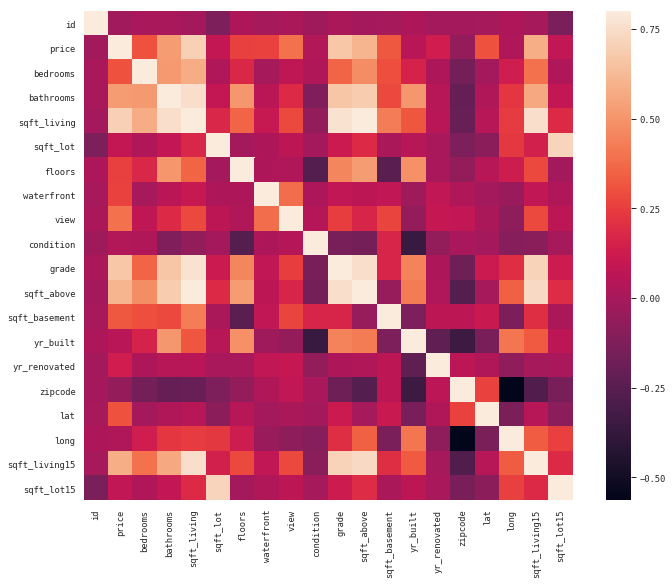

In [224]:
sns.set(context='paper', font='monospace')
corrmat = kcdata.corr()


f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.8, square=True);

Analyzing the heatmap, the variables that are highly correlated to price are:
* sqft_living
* sqft_above
* grade

Independent variables which are highly correlated with each other:

* sqft_living with sqft_living15, bathroom, grade, sqft_above
* grade with bathroom, sqft_above, sqft_living15, sqft_living

## Check Multicolinearity 

In [225]:
## Check Multicolinearity 

kcdata_set = kcdata.iloc[:,3:-1]
kcdata_set.head()
kcdata_set.corr()
abs(kcdata_set.corr()) > 0.75

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15
bedrooms,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,False,True
sqft_lot,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
grade,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False
sqft_above,False,False,True,False,False,False,False,False,True,True,False,False,False,False,False,False,False


The correlation matrix confirms the observation that sqft_living are highly correlated with bathrooms, grade, sqft_above, sqft_living15.

Multicolinearity exists here.

We will drop sqft_living15, sqft_lot15 because they are highly correlated with sqft_living and sqft_lot, and also zipcode, lat, long.

## Feature Transformation

### Turn view to binary variable

In [226]:
kcdata['view']=kcdata['view'].fillna(0)
kcdata['view'] = kcdata['view'].astype(int)

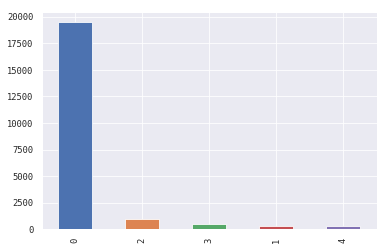

In [227]:
kcdata['view'].value_counts().plot(kind='bar')

In [228]:
kcdata['view'].describe()

count    21597.000000
mean         0.233181
std          0.764673
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

Since more than 75% values are 0, it might make sense to create a binary variable "viewed".

In [229]:
kcdata['viewed'] = pd.Series(len(kcdata['price']), index=kcdata.index)
kcdata['viewed'] = 0
kcdata.loc[kcdata['view']>0,'viewed']=1
viewed_dummy = pd.get_dummies(kcdata['viewed'], prefix ='view')

### Turn yr_renovated to binary variable

In [230]:
kcdata['renovated']=pd.Series(len(kcdata['price']), index=kcdata.index)
kcdata['renovated']=0
kcdata.loc[kcdata['yr_renovated']>0, 'renovated']=1

renovated_dummy = pd.get_dummies(kcdata['renovated'], prefix = 'renovated')

## Turn condition to dummy columns

(-0.5, 4.5, 0, 8000000)

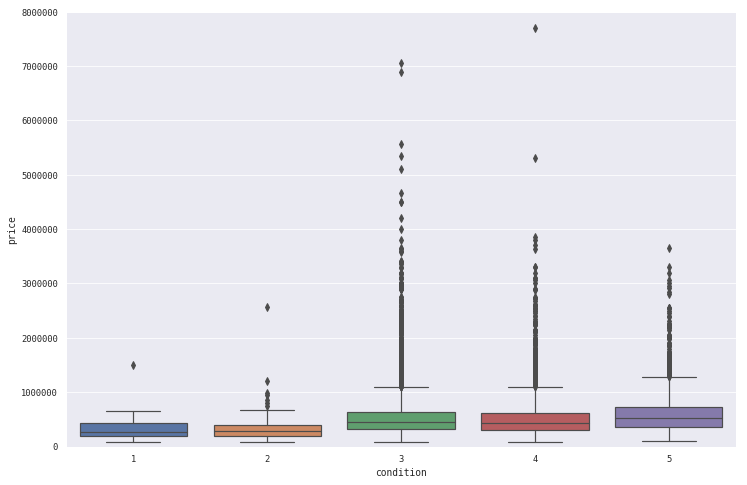

In [231]:
data = pd.concat([kcdata['price'], kcdata['condition']], axis=1)
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='condition', y='price', data=data)
fig.axis(ymin=0, ymax=8000000)

In [232]:
condition_dummies = pd.get_dummies(kcdata['condition'], prefix='con')

In [233]:

condition_dummies.head(10)

,con_1,con_2,con_3,con_4,con_5
0,0,0,1,0,0
1,0,0,1,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,1,0,0
5,0,0,1,0,0
6,0,0,1,0,0
7,0,0,1,0,0
8,0,0,1,0,0
9,0,0,1,0,0


## Convert Waterfront to binominal 

In [234]:
waterfront_dummy = pd.get_dummies(kcdata['waterfront'], prefix ='waterfront')

## Explore grade, bedrooms, bathrooms, years and floors

Although grade, bedrooms, bathrooms and floors are numerical values, it is diffidult to justify a linear pattern between these variables and target here. For example, grade 2 may not mean it is twice better than grade 1, or worse. It might make sense to restructure data into bins so that they are treated as categorical variables.

#### GRADE

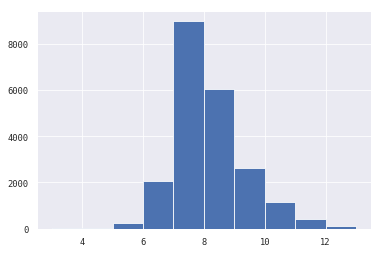

In [235]:
kcdata['grade'].describe()
kcdata['grade'].hist()

(-0.5, 10.5, 0, 8000000)

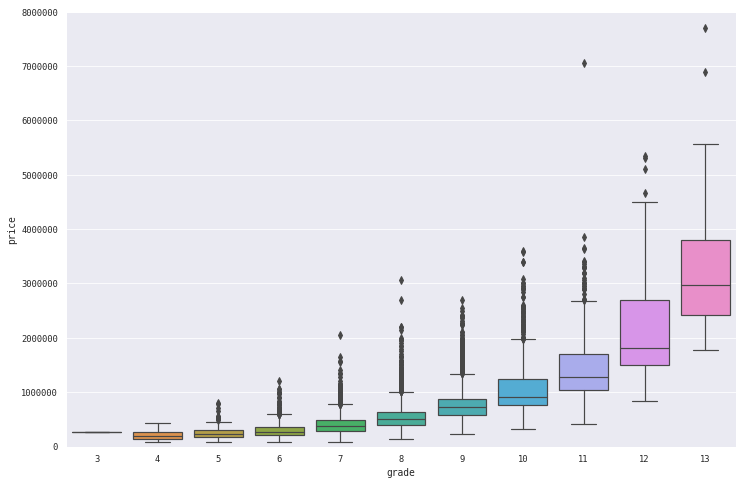

In [236]:
data = pd.concat([kcdata['price'], kcdata['grade']], axis=1)
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='grade', y='price', data=data)
fig.axis(ymin=0, ymax=8000000)

Boxplot shows obvious exponential relationship between grade and price. We will keep all grades and create dummy variables.

In [237]:
grade_dummy = pd.get_dummies(kcdata['grade'], prefix='grade')

#### BEDROOMS

In [238]:
kcdata['bedrooms'].describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

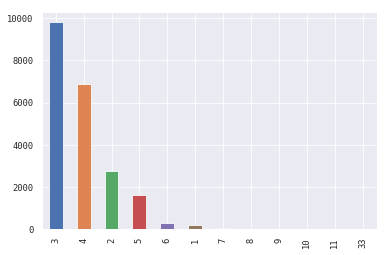

In [239]:
kcdata['bedrooms'].value_counts().plot(kind='bar')

There might be an outlier 33 in the bedroom variable. 

In [240]:
#The observation doesn't make sense, a house with 33 bedrooms only have 1040 sqft above the basement.
kcdata[kcdata['bedrooms']==33].sqft_above

15856    1040
Name: sqft_above, dtype: int64

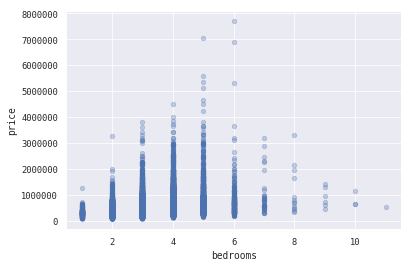

In [241]:
#Remove the max value from bedrooms
o = kcdata['bedrooms'].max()
kcdata = kcdata[kcdata['bedrooms']< o]
kcdata.plot(kind='scatter', x='bedrooms', y='price', alpha=0.3, color='b');


(-0.5, 10.5, 0, 8000000)

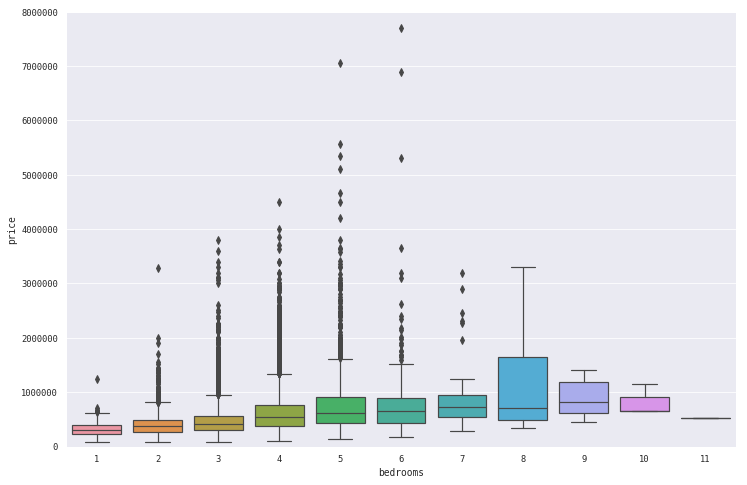

In [242]:

data = pd.concat([kcdata['price'], kcdata['bedrooms']], axis=1)
f, ax = plt.subplots(figsize=(12,8))
fig = sns.boxplot(x='bedrooms', y='price', data=data)
fig.axis(ymin=0, ymax=8000000)

In [243]:
kcdata['bedrooms'].describe()

count    21596.000000
mean         3.371828
std          0.904114
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         11.000000
Name: bedrooms, dtype: float64

In [244]:
bins = [1,2,3,4,5,6,11]
bins_bedroom = pd.cut(kcdata['bedrooms'],bins)
bins_bedroom = bins_bedroom.cat.as_unordered()
bedroom_dummy = pd.get_dummies(bins_bedroom, prefix='bedroom')

#### BATHROOMS

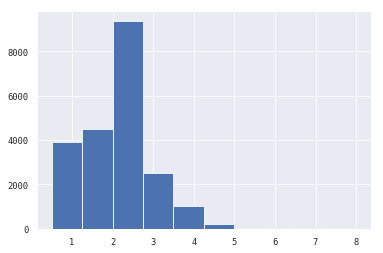

In [245]:
kcdata['bathrooms'].hist()
#kcdata['bathrooms'].value_counts();

The definition of 'bathrooms' is the number of bathrooms per bedrooms. Normally a residential building have 0.5-2 bathrooms per bedroom. So 3-8 bathrooms per bedroom may suggest there are different kinds of buildings. We can investigate the sqft_above and price to see if any outliers. 

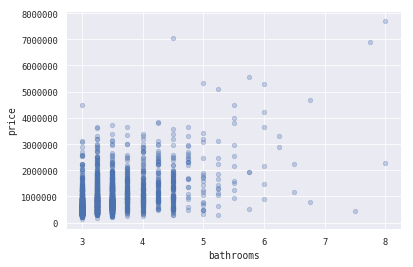

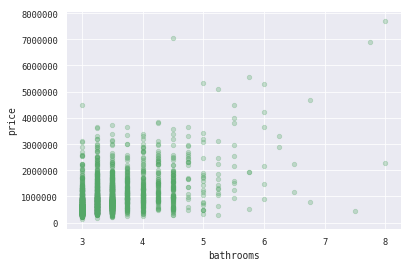

In [246]:
kcdata[kcdata['bathrooms']>=3].groupby('bathrooms').sqft_above.mean()
b = kcdata[kcdata['bathrooms']>=3]
b.plot(kind='scatter', x='bathrooms', y='price', alpha=0.3, color='b')
b.plot(kind='scatter', x='bathrooms', y='price', alpha=0.3, color='g')


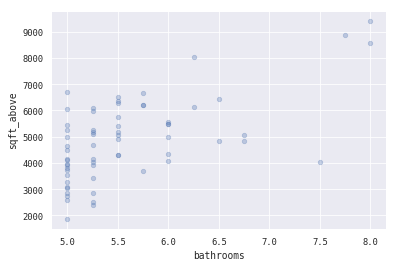

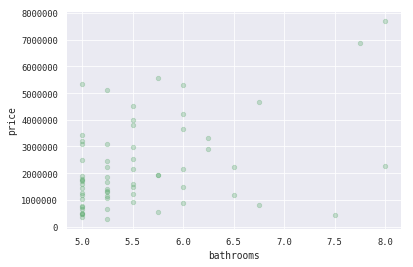

In [247]:
#Check bathrooms >5. 
kcdata[kcdata['bathrooms']>=5].groupby('bathrooms').sqft_above.mean()
a = kcdata[kcdata['bathrooms']>= 5]
a.plot(kind='scatter', x='bathrooms', y='sqft_above', alpha=0.3, color='b')
a.plot(kind='scatter', x='bathrooms', y='price', alpha=0.3, color='g')


We will create bins for bathrooms for now. 

In [248]:
bins = [0.5,1.5,2,2.5,5,8]
bins_bathroom = pd.cut(kcdata['bathrooms'],bins)
bins_bathroom = bins_bathroom.cat.as_unordered()
bathroom_dummy = pd.get_dummies(bins_bathroom, prefix='bathroom')

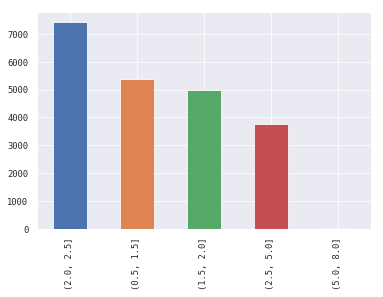

In [249]:
bins_bathroom.value_counts().plot(kind='bar')

#### FLOORS

In [250]:
kcdata['floors'].describe()

count    21596.000000
mean         1.494119
std          0.539685
min          1.000000
25%          1.000000
50%          1.500000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

In [251]:
bins = [0,1,1.5,2,3.5]
bins_floors = pd.cut(kcdata['floors'],bins)
bins_floors = bins_floors.cat.as_unordered()
floors_dummy = pd.get_dummies(bins_floors, prefix = 'floors')

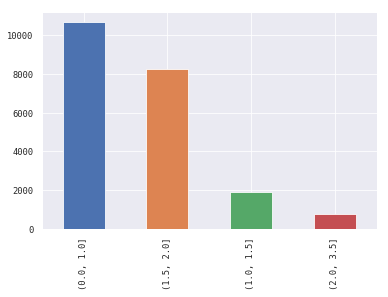

In [252]:
bins_floors.value_counts().plot(kind='bar')

#### Year Built

In [253]:
kcdata['yr_built'].describe()

count    21596.000000
mean      1971.000787
std         29.375460
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

(-0.5, 115.5, 0, 8000000)

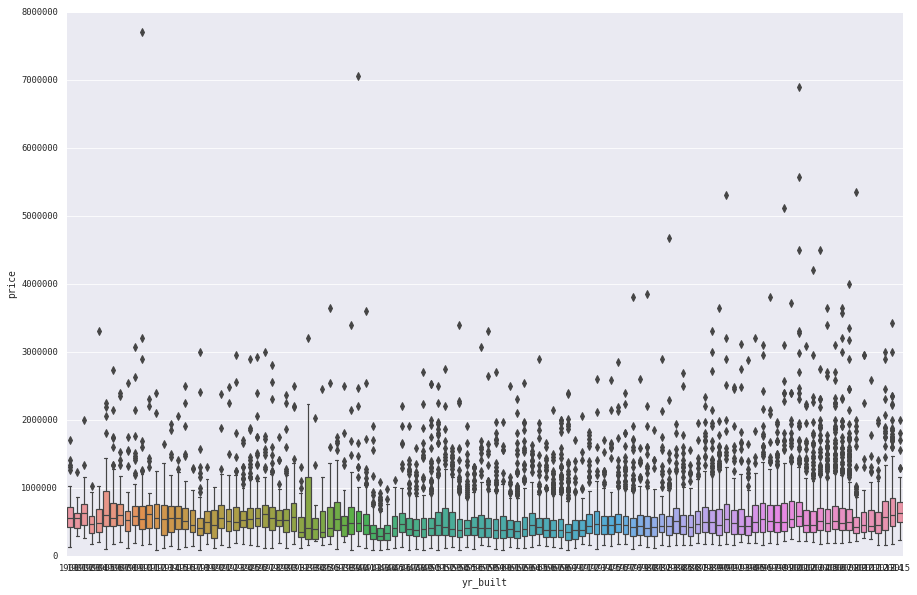

In [254]:
data = pd.concat([kcdata['price'], kcdata['yr_built']], axis=1)
f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x='yr_built', y='price', data=data)
fig.axis(ymin=0, ymax=8000000)

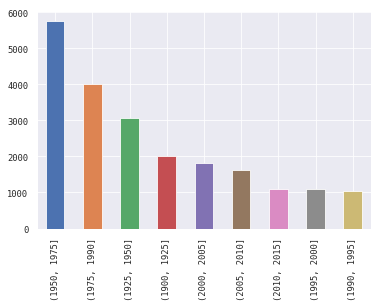

In [255]:
bins = [1900,1925,1950,1975,1990,1995,2000,2005,2010, 2015]
bins_year = pd.cut(kcdata['yr_built'],bins)
bins_year = bins_year.cat.as_unordered()
bins_year.head()
year_dummy=pd.get_dummies(bins_year, prefix='year')

bins_year.value_counts().plot(kind='bar')

(-0.5, 8.5, 0, 8000000)

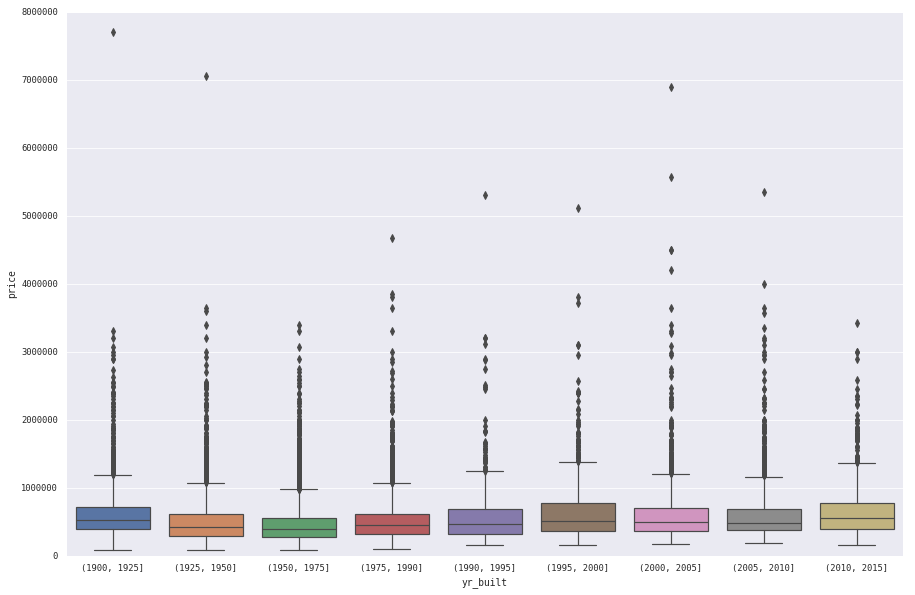

In [256]:
data = pd.concat([kcdata['price'], bins_year], axis=1)
f, ax = plt.subplots(figsize=(15,10))
fig = sns.boxplot(x='yr_built', y='price', data=data)
fig.axis(ymin=0, ymax=8000000)

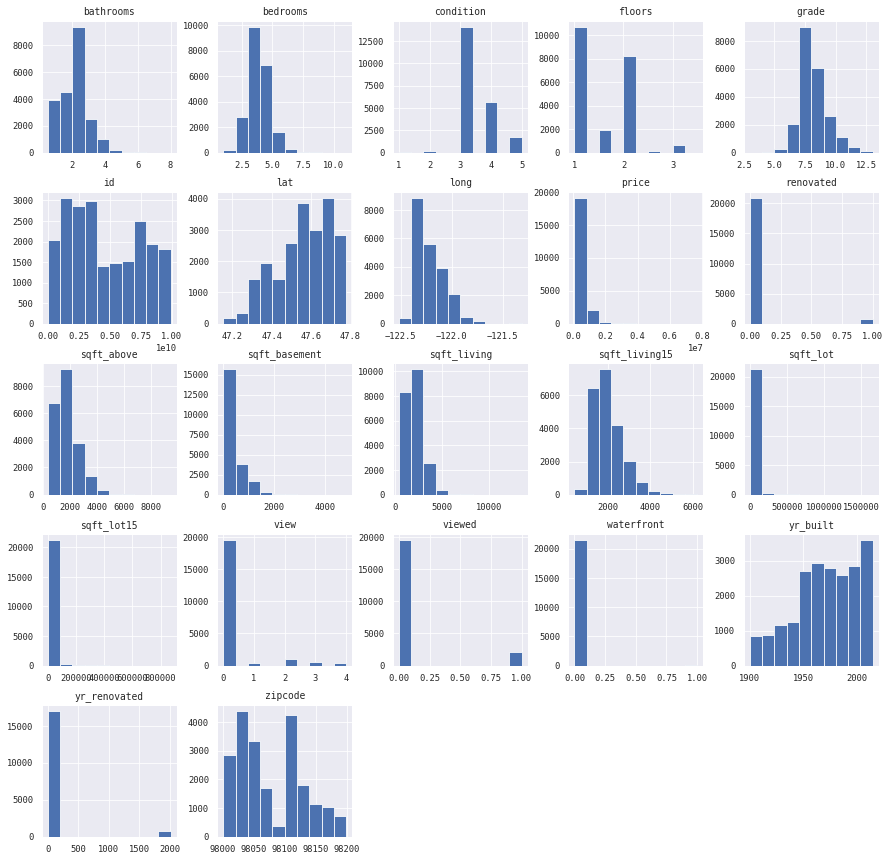

In [257]:
kcdata.hist(figsize=[15,15]);

## Feature Scaling and Normalization

In [258]:
zipcode_dummies = pd.get_dummies(kcdata['zipcode'], prefix='zipcode')
year_dummies=pd.get_dummies(kcdata['yr_built'], prefix='year')

In [259]:
kcdata = pd.concat([kcdata, grade_dummy, floors_dummy, viewed_dummy, bedroom_dummy, bathroom_dummy, condition_dummies, waterfront_dummy, year_dummy, zipcode_dummies, renovated_dummy], axis=1)

In [260]:
kcdata_set = kcdata.drop(['yr_built', 'yr_renovated', 'grade', 'floors', 'view','sqft_living15','sqft_lot15','viewed', 'zipcode', 'bedrooms','bathrooms','lat','long','condition','waterfront','renovated'], axis=1)

In [261]:
kcdata_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Columns: 123 entries, id to renovated_1
dtypes: datetime64[ns](1), float64(100), uint8(22)
memory usage: 17.3 MB


In [262]:
kcdata_set.dropna(inplace=True)

 
Variables with lepto kurtosis: price, sqft_lot
Variables with either positive or negative Skewness: sqft_above, sqft_living

We will perform log transformation to variables with skewness and then do mean normalization. 

### Feature transformation and scalling

In [263]:
kcdata_log = pd.DataFrame([])
kcdata_log['sqft_above']=np.log(kcdata_set['sqft_above'])
kcdata_log['sqft_living']=np.log(kcdata_set['sqft_living'])
kcdata_log['price']=np.log(kcdata_set['price'])

In [264]:
basement = kcdata_set['sqft_basement']
lot = kcdata_set['sqft_lot']
logabove = kcdata_log['sqft_above']
logliving = kcdata_log['sqft_living']
logprice = kcdata_log['price']


scaled_basement= (basement - min(basement))/(max(basement) - min(basement))
scaled_lot = (lot - min(lot))/(max(lot) - min(lot))
scaled_above = (logabove - np.mean(logabove))/np.sqrt(np.var(logabove))
scaled_living = (logliving - np.mean(logliving))/np.sqrt(np.var(logliving))
scaled_price = (logprice - np.mean(logprice))/np.sqrt(np.var(logprice))


kcdata_set['price']=scaled_price
kcdata_set['sqft_living']=scaled_living
kcdata_set['sqft_above']=scaled_above
kcdata_set['sqft_lot']=scaled_lot
kcdata_set['sqft_basement']=scaled_basement

In [265]:
kcdata_set.dropna(inplace=True)
kcdata_log.dropna(inplace=True)

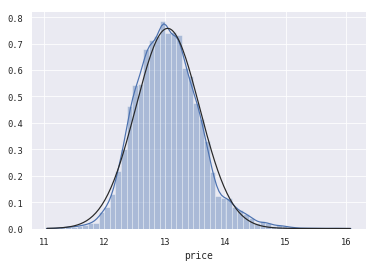

<Figure size 432x288 with 0 Axes>

In [266]:
sns.distplot(kcdata_log['price'], fit=norm)
fig = plt.figure()


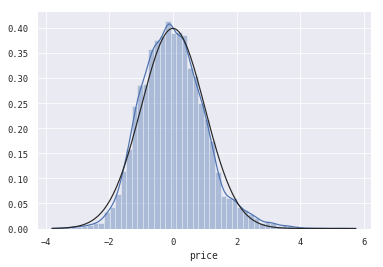

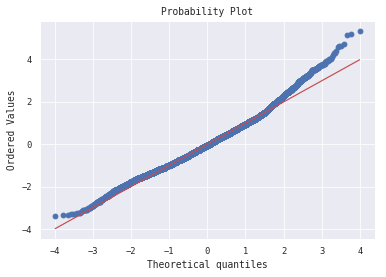

In [267]:
sns.distplot(kcdata_set['price'], fit=norm)
fig=plt.figure()
res = stats.probplot(kcdata_set['price'],plot=plt)

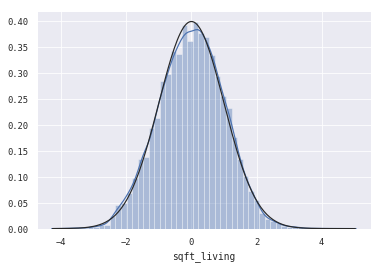

<Figure size 432x288 with 0 Axes>

In [268]:
sns.distplot(kcdata_set['sqft_living'], fit=norm)
fig=plt.figure()

Resources: https://medium.com/vickdata/four-feature-types-and-how-to-transform-them-for-machine-learning-8693e1c24e80

## IV. Model using statsmodels and sklearn

### Simple Linear Regression on area variables

In [269]:
import statsmodels.api as sms
from statsmodels.formula.api import ols

In [270]:
data_ols = kcdata_set.iloc[:,2:]
data_ols.dropna(inplace=True)

In [271]:
data_ols.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'renovated_0', 'renovated_1'],
      dtype='object', length=121)

#### Univariate Regression

In [272]:
X = data_ols.sqft_living
y = data_ols.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 1.806e+04
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -24082.
No. Observations:               21596   AIC:                         4.817e+04
Df Residuals:                   21595   BIC:                         4.817e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living     0.6748      0.005    134.375      0.000       0.665       0.685
==============================================================================
Omnibus:                      123.586   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.131
Skew:                           0.143   Prob(JB):                     1.65e-25
Kurtosis:                       2.788   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [273]:
X = data_ols.sqft_basement
y = data_ols.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     1599.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -29872.
No. Observations:               21596   AIC:                         5.975e+04
Df Residuals:                   21595   BIC:                         5.975e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
sqft_basement     2.4131      0.060     39.988      0.000       2.295       2.531
==============================================================================
Omnibus:                      640.415   Durbin-Watson:                   1.901
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              751.688
Skew:                           0.384   Prob(JB):                    5.93e-164
Kurtosis:                       3.497   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [274]:
X = data_ols.sqft_above
y = data_ols.price

model = sms.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.343
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                 1.130e+04
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:04   Log-Likelihood:                -26100.
No. Observations:               21596   AIC:                         5.220e+04
Df Residuals:                   21595   BIC:                         5.221e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
sqft_above     0.5861      0.006    106.290      0.000       0.575       0.597
==============================================================================
Omnibus:                      138.784   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.468
Skew:                           0.188   Prob(JB):                     5.19e-31
Kurtosis:                       2.883   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The square footage of house apart from basement seems to be significant to house price too. 

#### Let's put all variables into the model and let algorithm decide which variable to keep.

In [275]:
predictors = data_ols.drop('price', axis=1)
X = predictors
y = data_ols['price']

In [276]:
import statsmodels.api as sm
#from statsmodels.formula.api import ols

X_int = sm.add_constant(predictors)

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.880
Method:                 Least Squares   F-statistic:                     1408.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:05   Log-Likelihood:                -7655.9
No. Observations:               21596   AIC:                         1.554e+04
Df Residuals:                   21482   BIC:                         1.645e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.2324      0.060      3.890      0.000       0.115       0.349
sqft_living             0.2632      0.013     19.640      0.000       0.237       0.289
sqft_lot                2.3141      0.104     22.249      0.000       2.110       2.518
sqft_above              0.1640      0.012     13.356      0.000       0.140       0.188
sqft_basement           0.1390      0.072      1.935      0.053      -0.002       0.280
grade_3                 0.3675      0.317      1.158      0.247      -0.255       0.990
grade_4                -0.6913      0.070     -9.809      0.000      -0.829      -0.553
grade_5                -0.7618      0.040    -19.121      0.000      -0.840      -0.684
grade_6                -0.6169      0.035    -17.750      0.000      -0.685      -0.549
grade_7                -0.4407      0.034    -12.975      0.000      -0.507      -0.374
grade_8                -0.2659      0.034     -7.834      0.000      -0.332      -0.199
grade_9                -0.0225      0.034     -0.655      0.512      -0.090       0.045
grade_10                0.1876      0.035      5.302      0.000       0.118       0.257
grade_11                0.4400      0.038     11.609      0.000       0.366       0.514
grade_12                0.7310      0.049     14.947      0.000       0.635       0.827
grade_13                1.3055      0.098     13.387      0.000       1.114       1.497
floors_(0.0, 1.0]       0.1722      0.016     10.570      0.000       0.140       0.204
floors_(1.0, 1.5]       0.1040      0.017      6.143      0.000       0.071       0.137
floors_(1.5, 2.0]       0.0556      0.016      3.486      0.000       0.024       0.087
floors_(2.0, 3.5]      -0.0994      0.019     -5.266      0.000      -0.136      -0.062
view_0                 -0.0381      0.030     -1.262      0.207      -0.097       0.021
view_1                  0.2705      0.030      8.952      0.000       0.211       0.330
bedroom_(1, 2]         -0.0765      0.026     -2.896      0.004      -0.128      -0.025
bedroom_(2, 3]         -0.0950      0.027     -3.554      0.000      -0.147      -0.043
bedroom_(3, 4]         -0.1033      0.028     -3.753      0.000      -0.157      -0.049
bedroom_(4, 5]         -0.1411      0.029     -4.862      0.000      -0.198      -0.084
bedroom_(5, 6]         -0.1748      0.035     -4.977      0.000      -0.244      -0.106
bedroom_(6, 11]        -0.3570      0.053     -6.692      0.000      -0.462      -0.252
bathroom_(0.5, 1.5]     0.3176      0.173      1.831      0.067      -0.022       0.658
bathroom_(1.5, 2.0]     0.3378      0.174      1.947      0.052      -0.002       0.678
bathroom_(2.0, 2.5]     0.3888      0.174      2.240      0.025       0.049       0.729
bathroom_(2.5, 5.0]     0.4289      0.174      2.469      0.014       0.088       0.769
bat

The adjusted R-square is very high, however, many variables have big p values.

## Let us use sklearn RFE (recursive feature elimination)

#You have to use numerical values in sklearn... has to transform to dummy variables...
https://www.scikit-yb.org/en/latest/api/features/rfecv.html

In [277]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [278]:
predictors = data_ols.drop('price', axis=1)
X = predictors
y = data_ols['price']

linreg = LinearRegression()
selector = RFE(linreg,n_features_to_select=100)
selector = selector.fit(X,y)

In [279]:
data_ols.columns

Index(['price', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement',
       'grade_3', 'grade_4', 'grade_5', 'grade_6', 'grade_7',
       ...
       'zipcode_98155', 'zipcode_98166', 'zipcode_98168', 'zipcode_98177',
       'zipcode_98178', 'zipcode_98188', 'zipcode_98198', 'zipcode_98199',
       'renovated_0', 'renovated_1'],
      dtype='object', length=121)

In [280]:
selector.support_

array([ True,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False, False, False, False, False, False,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [281]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 3.73682455e-01  2.33151475e+00 -1.24234435e+11 -1.24234435e+11
 -1.24234435e+11 -1.24234435e+11 -1.24234435e+11 -1.24234435e+11
 -1.24234435e+11 -1.24234435e+11 -1.24234435e+11 -1.24234435e+11
 -1.24234435e+11  3.48523883e+10  3.48523883e+10  3.48523883e+10
  3.48523883e+10  9.68531211e+08  9.68531212e+08  4.36096191e-02
  2.38676071e-02 -1.55883523e+10 -1.55883523e+10 -1.55883523e+10
 -1.55883523e+10 -1.55883523e+10 -1.92429342e+09 -1.92429342e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09 -1.88439281e+09
 -1.88439281e+09 -1.88439

In [282]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)
selected_columns

Index(['sqft_living', 'sqft_lot', 'grade_3', 'grade_4', 'grade_5', 'grade_6',
       'grade_7', 'grade_8', 'grade_9', 'grade_10', 'grade_11', 'grade_12',
       'grade_13', 'floors_(0.0, 1.0]', 'floors_(1.0, 1.5]',
       'floors_(1.5, 2.0]', 'floors_(2.0, 3.5]', 'view_0', 'view_1',
       'bathroom_(2.5, 5.0]', 'bathroom_(5.0, 8.0]', 'con_1', 'con_2', 'con_3',
       'con_4', 'con_5', 'waterfront_0.0', 'waterfront_1.0', 'zipcode_98001',
       'zipcode_98002', 'zipcode_98003', 'zipcode_98004', 'zipcode_98005',
       'zipcode_98006', 'zipcode_98007', 'zipcode_98008', 'zipcode_98010',
       'zipcode_98011', 'zipcode_98014', 'zipcode_98019', 'zipcode_98022',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98030', 'zipcode_98031', 'zipcode_98032',
       'zipcode_98033', 'zipcode_98034', 'zipcode_98038', 'zipcode_98039',
       'zipcode_98040', 'zipcode_98042', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_

In [283]:
X_int = sm.add_constant(predictors[selected_columns])

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     1621.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:35   Log-Likelihood:                -8176.0
No. Observations:               21596   AIC:                         1.654e+04
Df Residuals:                   21502   BIC:                         1.729e+04
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                8.682e+10   5.04e+11      0.172      0.863   -9.02e+11    1.08e+12
sqft_living             0.3736      0.004     90.873      0.000       0.366       0.382
sqft_lot                2.3301      0.106     22.002      0.000       2.122       2.538
grade_3              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_4              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_5              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_6              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_7              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_8              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_9              9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_10             9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_11             9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_12             9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
grade_13             9.349e+09   5.43e+10      0.172      0.863   -9.71e+10    1.16e+11
floors_(0.0, 1.0]    2.896e+10   1.68e+11      0.172      0.863   -3.01e+11    3.59e+11
floors_(1.0, 1.5]    2.896e+10   1.68e+11      0.172      0.863   -3.01e+11    3.59e+11
floors_(1.5, 2.0]    2.896e+10   1.68e+11      0.172      0.863   -3.01e+11    3.59e+11
floors_(2.0, 3.5]    2.896e+10   1.68e+11      0.172      0.863   -3.01e+11    3.59e+11
view_0              -2.535e+10   1.47e+11     -0.172      0.863   -3.14e+11    2.63e+11
view_1              -2.535e+10   1.47e+11     -0.172      0.863   -3.14e+11    2.63e+11
bathroom_(2.5, 5.0]     0.0436      0.008      5.762      0.000       0.029       0.058
bathroom_(5.0, 8.0]     0.0240      0.059      0.408      0.683      -0.091       0.140
con_1                 7.48e+09   4.35e+10      0.172      0.863   -7.77e+10    9.27e+10
con_2                 7.48e+09   4.35e+10      0.172      0.863   -7.77e+10    9.27e+10
con_3                 7.48e+09   4.35e+10      0.172      0.863   -7.77e+10    9.27e+10
con_4                 7.48e+09   4.35e+10      0.172      0.863   -7.77e+10    9.27e+10
con_5                 7.48e+09   4.35e+10      0.172      0.863   -7.77e+10    9.27e+10
waterfront_0.0      -7.664e+10   4.45e+11     -0.172      0.863    -9.5e+11    7.96e+11
waterfront_1.0      -7.664e+10   4.45e+11     -0.172      0.863    -9.5e+11    7.96e+11
zipcode_98001        1.374e+09   7.98e+09      0.172      0.863   -1.43e+10     1.7e+10
zipcode_98002        1.374e+09   7.98e+09      0.172      0.863   -1.43e+10     1.7e+10
zipcode_98003        1.374e+09   7.98e+09      0.172      0.863   -1.43e+10     1.7e+10
zip

#### The results are still not satisfying with so many insignificant variables. 

#### 

#### Let's try to do some combination: forward selection and then stepwise! 

There are too many variables which increase step-wise processing time significantly. 
We know from the data exploration that location and grade are important to price. Let's model them first and select relevant zipcodes and grades. Since step-wise selection keeps variables with low p-value, we can run step-wise selection on one set of categorical variables first and then add other features.

In [284]:
df = data_ols.filter(regex='zipcode|grade')

In [285]:
df.head()

,grade_3,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [286]:
X = df
y = data_ols['price']

import statsmodels.api as sm

X_int = sm.add_constant(X)

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     923.2
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:38:56   Log-Likelihood:                -14671.
No. Observations:               21596   AIC:                         2.950e+04
Df Residuals:                   21516   BIC:                         3.014e+04
Df Model:                          79                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2.363e+11    4.1e+11      0.577      0.564   -5.67e+11    1.04e+12
grade_3       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_4       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_5       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_6       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_7       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_8       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_9       -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_10      -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_11      -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_12      -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
grade_13      -2.443e+11   4.23e+11     -0.577      0.564   -1.07e+12    5.86e+11
zipcode_98001  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98002  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98003  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98004  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98005  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98006  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98007  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98008  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98010  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98011  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98014  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98019  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98022  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98023  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98024  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98027  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98028  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98029  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98030  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98031  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98032  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98033  7.982e+09   1.38e+10      0.577      0.564   -1.91e+10    3.51e+10
zipcode_98034  7.982e+09   1.38e+10      0.577   

### Stepwise Selection

In [287]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [288]:
X = df
y = data_ols['price']

In [289]:
result = stepwise_selection(X, y, verbose = True)
print(result)

Add  grade_10                       with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  grade_8                        with p-value 0.0
Add  grade_11                       with p-value 0.0
Add  grade_12                       with p-value 0.0
Add  grade_7                        with p-value 1.58859e-256
Add  zipcode_98004                  with p-value 1.3098e-206
Add  zipcode_98023                  with p-value 8.62432e-206
Add  zipcode_98042                  with p-value 7.87754e-138
Add  zipcode_98001                  with p-value 4.31994e-136
Add  grade_13                       with p-value 4.88924e-138
Add  zipcode_98092                  with p-value 7.21897e-141
Add  zipcode_98003                  with p-value 4.8009e-134
Add  zipcode_98112                  with p-value 8.40232e-112
Add  zipcode_98040                  with p-value 4.07661e-109
Add  zipcode_98115                  with p-value 7.0388e-109
Add  zipcode_98038                  with p-value 9.00383

We now add sqft_above and year.

In [290]:
result.append('sqft_living')

In [291]:
b = data_ols.filter(like='year')

In [292]:
year_result = stepwise_selection(b, y, verbose=True)
year_result

Add  year_(1950, 1975]              with p-value 1.23151e-106
Add  year_(1925, 1950]              with p-value 3.83108e-52
Add  year_(1975, 1990]              with p-value 6.54131e-49
Add  year_(1990, 1995]              with p-value 3.77943e-09
Add  year_(2010, 2015]              with p-value 3.38282e-06
Add  year_(1995, 2000]              with p-value 0.005541


['year_(1950, 1975]',
 'year_(1925, 1950]',
 'year_(1975, 1990]',
 'year_(1990, 1995]',
 'year_(2010, 2015]',
 'year_(1995, 2000]']

In [293]:
result = result + year_result

In [294]:
data_ols[result];

In [295]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

X_int = sm.add_constant(data_ols[result])

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1585.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:42:03   Log-Likelihood:                -10271.
No. Observations:               21596   AIC:                         2.070e+04
Df Residuals:                   21519   BIC:                         2.131e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.3224      0.028    -11.670      0.000      -0.377      -0.268
grade_10              0.9853      0.031     31.460      0.000       0.924       1.047
grade_9               0.7224      0.029     24.851      0.000       0.665       0.779
grade_8               0.4327      0.027     15.737      0.000       0.379       0.487
grade_11              1.3069      0.036     36.387      0.000       1.237       1.377
grade_12              1.7398      0.052     33.384      0.000       1.638       1.842
grade_7               0.2408      0.027      9.082      0.000       0.189       0.293
zipcode_98004         1.1500      0.023     49.399      0.000       1.104       1.196
zipcode_98023        -1.0404      0.019    -54.906      0.000      -1.078      -1.003
zipcode_98042        -0.8382      0.018    -46.107      0.000      -0.874      -0.803
zipcode_98001        -0.9945      0.022    -45.627      0.000      -1.037      -0.952
grade_13              2.1785      0.114     19.152      0.000       1.956       2.401
zipcode_98092        -0.9159      0.022    -41.556      0.000      -0.959      -0.873
zipcode_98003        -0.9485      0.024    -38.788      0.000      -0.996      -0.901
zipcode_98112         0.9199      0.025     36.730      0.000       0.871       0.969
zipcode_98040         0.7956      0.025     32.204      0.000       0.747       0.844
zipcode_98115         0.4880      0.018     26.938      0.000       0.453       0.524
zipcode_98038        -0.6620      0.018    -37.251      0.000      -0.697      -0.627
zipcode_98030        -0.9100      0.025    -35.729      0.000      -0.960      -0.860
zipcode_98058        -0.6753      0.020    -34.366      0.000      -0.714      -0.637
zipcode_98031        -0.8410      0.025    -33.960      0.000      -0.890      -0.792
zipcode_98002        -1.0335      0.029    -35.887      0.000      -1.090      -0.977
zipcode_98168        -0.9271      0.025    -36.546      0.000      -0.977      -0.877
zipcode_98198        -0.7886      0.025    -32.156      0.000      -0.837      -0.740
zipcode_98032        -1.0405      0.036    -29.134      0.000      -1.111      -0.971
zipcode_98055        -0.7383      0.025    -29.594      0.000      -0.787      -0.689
zipcode_98022        -0.7143      0.027    -26.790      0.000      -0.767      -0.662
zipcode_98105         0.7672      0.027     28.354      0.000       0.714       0.820
zipcode_98039         1.5029      0.056     26.785      0.000       1.393       1.613
zipcode_98178        -0.7039      0.025    -27.665      0.000      -0.754      -0.654
zipcode_98106        -0.4325      0.023    -18.961      0.000      -0.477      -0.388
zipcode_98188        -0.8353      0.034    -24.324      0.000      -0.903      -0.768
zipcode_98033         0.5112      0.020     25.473      0.000       0.472

The result is pretty good with only one insignificant variable (p> 0.05). Let's try to add bedroom and bathroom too. 

In [296]:
room = data_ols.filter(like='room')

room_result = stepwise_selection(room, y, verbose=True)
room_result

Add  bathroom_(2.5, 5.0]            with p-value 0.0
Add  bathroom_(2.0, 2.5]            with p-value 0.0
Add  bathroom_(0.5, 1.5]            with p-value 8.18056e-172
Add  bathroom_(5.0, 8.0]            with p-value 1.39461e-112
Add  bedroom_(2, 3]                 with p-value 1.31063e-61
Add  bedroom_(1, 2]                 with p-value 5.32688e-22
Add  bedroom_(4, 5]                 with p-value 2.58256e-05
Add  bedroom_(3, 4]                 with p-value 1.05326e-06
Drop bedroom_(1, 2]                 with p-value 0.717313
Add  bedroom_(5, 6]                 with p-value 2.43016e-05
Drop bedroom_(2, 3]                 with p-value 0.130235
Add  bathroom_(1.5, 2.0]            with p-value 0.00454202
Drop bathroom_(0.5, 1.5]            with p-value 0.0602506
Add  bedroom_(1, 2]                 with p-value 0.00897649


['bathroom_(2.5, 5.0]',
 'bathroom_(2.0, 2.5]',
 'bathroom_(5.0, 8.0]',
 'bedroom_(4, 5]',
 'bedroom_(3, 4]',
 'bedroom_(5, 6]',
 'bathroom_(1.5, 2.0]',
 'bedroom_(1, 2]']

In [297]:
result = result + room_result

In [298]:
#Now we have year, room, zipcode, sqft_above, grade
X_int = sm.add_constant(data_ols[result])

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     1441.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:42:35   Log-Likelihood:                -10224.
No. Observations:               21596   AIC:                         2.062e+04
Df Residuals:                   21511   BIC:                         2.130e+04
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3166      0.029    -11.030      0.000      -0.373      -0.260
grade_10                0.9598      0.032     30.458      0.000       0.898       1.022
grade_9                 0.7119      0.029     24.340      0.000       0.655       0.769
grade_8                 0.4294      0.028     15.500      0.000       0.375       0.484
grade_11                1.2665      0.036     35.030      0.000       1.196       1.337
grade_12                1.6812      0.053     31.586      0.000       1.577       1.786
grade_7                 0.2399      0.027      9.019      0.000       0.188       0.292
zipcode_98004           1.1488      0.023     49.385      0.000       1.103       1.194
zipcode_98023          -1.0375      0.019    -54.824      0.000      -1.075      -1.000
zipcode_98042          -0.8328      0.018    -45.865      0.000      -0.868      -0.797
zipcode_98001          -0.9900      0.022    -45.486      0.000      -1.033      -0.947
grade_13                2.1242      0.117     18.154      0.000       1.895       2.354
zipcode_98092          -0.9104      0.022    -41.357      0.000      -0.954      -0.867
zipcode_98003          -0.9463      0.024    -38.774      0.000      -0.994      -0.898
zipcode_98112           0.9151      0.025     36.552      0.000       0.866       0.964
zipcode_98040           0.7973      0.025     32.290      0.000       0.749       0.846
zipcode_98115           0.4845      0.018     26.748      0.000       0.449       0.520
zipcode_98038          -0.6566      0.018    -36.952      0.000      -0.691      -0.622
zipcode_98030          -0.9020      0.025    -35.462      0.000      -0.952      -0.852
zipcode_98058          -0.6710      0.020    -34.190      0.000      -0.709      -0.632
zipcode_98031          -0.8342      0.025    -33.725      0.000      -0.883      -0.786
zipcode_98002          -1.0308      0.029    -35.834      0.000      -1.087      -0.974
zipcode_98168          -0.9272      0.025    -36.597      0.000      -0.977      -0.878
zipcode_98198          -0.7917      0.024    -32.333      0.000      -0.840      -0.744
zipcode_98032          -1.0358      0.036    -29.046      0.000      -1.106      -0.966
zipcode_98055          -0.7370      0.025    -29.596      0.000      -0.786      -0.688
zipcode_98022          -0.7170      0.027    -26.919      0.000      -0.769      -0.665
zipcode_98105           0.7635      0.027     28.224      0.000       0.710       0.817
zipcode_98039           1.4914      0.056     26.514      0.000       1.381       1.602
zipcode_98178          -0.7038      0.025    -27.702      0.000      -0.754      -0.654
zipcode_98106          -0.4320      0.023    -18.953      0.000      -0.477      -0.387
zipcode_98188          -0.8341      0.034    -24.328      0.000      -0.901      -0.767
zip

Pretty satified with the result already, but let's try adding condition, renovation and waterfront.

In [299]:
water = data_ols.filter(like='waterfront')
condition = data_ols.filter(like='con')
renovated = data_ols.filter(like='renovated')


In [301]:
water_result = stepwise_selection(water, y, verbose=True)

Add  waterfront_0.0                 with p-value 6.30509e-141
Add  waterfront_1.0                 with p-value 1.07313e-140


In [302]:
condition_result = stepwise_selection(condition, y, verbose=True)


Add  con_2                          with p-value 8.16197e-37
Add  con_5                          with p-value 3.72014e-18
Add  con_3                          with p-value 1.07471e-08
Add  con_1                          with p-value 2.93862e-07


In [303]:
renovation_result = stepwise_selection(renovated, y, verbose=True)

Add  renovated_1                    with p-value 1.52167e-55
Add  renovated_0                    with p-value 6.21674e-54


In [304]:
result = result + water_result + condition_result + renovation_result

In [305]:
#Now we have year, room, zipcode, sqft_above, grade, condition, water
X_int = sm.add_constant(data_ols[result])

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1532.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:43:16   Log-Likelihood:                -9013.0
No. Observations:               21596   AIC:                         1.821e+04
Df Residuals:                   21505   BIC:                         1.893e+04
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1.012e+11   7.45e+11      0.136      0.892   -1.36e+12    1.56e+12
grade_10                1.0008      0.030     33.194      0.000       0.942       1.060
grade_9                 0.7556      0.028     27.036      0.000       0.701       0.810
grade_8                 0.4662      0.026     17.619      0.000       0.414       0.518
grade_11                1.2961      0.034     37.594      0.000       1.229       1.364
grade_12                1.6413      0.051     32.437      0.000       1.542       1.740
grade_7                 0.2686      0.025     10.586      0.000       0.219       0.318
zipcode_98004           1.1506      0.022     52.175      0.000       1.107       1.194
zipcode_98023          -1.0369      0.018    -57.901      0.000      -1.072      -1.002
zipcode_98042          -0.8517      0.017    -49.514      0.000      -0.885      -0.818
zipcode_98001          -0.9825      0.021    -47.736      0.000      -1.023      -0.942
grade_13                2.2367      0.111     20.195      0.000       2.020       2.454
zipcode_98092          -0.9119      0.021    -43.787      0.000      -0.953      -0.871
zipcode_98003          -0.9356      0.023    -40.526      0.000      -0.981      -0.890
zipcode_98112           0.8980      0.024     37.832      0.000       0.851       0.944
zipcode_98040           0.7249      0.023     30.902      0.000       0.679       0.771
zipcode_98115           0.4781      0.017     27.876      0.000       0.444       0.512
zipcode_98038          -0.6505      0.017    -38.711      0.000      -0.683      -0.618
zipcode_98030          -0.8979      0.024    -37.323      0.000      -0.945      -0.851
zipcode_98058          -0.6712      0.019    -36.149      0.000      -0.708      -0.635
zipcode_98031          -0.8477      0.023    -36.215      0.000      -0.894      -0.802
zipcode_98002          -1.0700      0.027    -39.241      0.000      -1.123      -1.017
zipcode_98168          -0.8856      0.024    -36.916      0.000      -0.933      -0.839
zipcode_98198          -0.8248      0.023    -35.598      0.000      -0.870      -0.779
zipcode_98032          -1.0515      0.034    -31.160      0.000      -1.118      -0.985
zipcode_98055          -0.7245      0.024    -30.766      0.000      -0.771      -0.678
zipcode_98022          -0.7638      0.025    -30.229      0.000      -0.813      -0.714
zipcode_98105           0.7270      0.026     28.377      0.000       0.677       0.777
zipcode_98039           1.4709      0.053     27.623      0.000       1.367       1.575
zipcode_98178          -0.7175      0.024    -29.756      0.000      -0.765      -0.670
zipcode_98106          -0.4204      0.022    -19.499      0.000      -0.463      -0.378
zipcode_98188          -0.8130      0.032    -25.063      0.000      -0.877      -0.749
zip

In [306]:
data_ols[result].dropna(inplace = True)

In [307]:
final_result = stepwise_selection(data_ols[result], y , verbose=True)

Add  grade_10                       with p-value 0.0
Add  grade_9                        with p-value 0.0
Add  bathroom_(2.5, 5.0]            with p-value 0.0
Add  grade_8                        with p-value 0.0
Add  sqft_living                    with p-value 0.0
Add  grade_11                       with p-value 5.48603e-271
Add  zipcode_98023                  with p-value 1.79229e-224
Add  zipcode_98004                  with p-value 9.92548e-220
Add  zipcode_98042                  with p-value 5.05542e-163
Add  grade_12                       with p-value 4.05945e-163
Add  zipcode_98001                  with p-value 1.72989e-162
Add  zipcode_98092                  with p-value 3.78466e-162
Add  zipcode_98038                  with p-value 1.92325e-139
Add  zipcode_98003                  with p-value 2.96661e-147
Add  zipcode_98058                  with p-value 2.08345e-137
Add  zipcode_98030                  with p-value 2.30638e-139
Add  zipcode_98168                  with p-value 1.99

In [308]:
X_int = sm.add_constant(data_ols[final_result])

model = sm.OLS(y, X_int).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     1682.
Date:                Mon, 20 May 2019   Prob (F-statistic):               0.00
Time:                        20:47:49   Log-Likelihood:                -9012.6
No. Observations:               21596   AIC:                         1.819e+04
Df Residuals:                   21513   BIC:                         1.885e+04
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.7142      0.027     26.546      0.000       0.661       0.767
grade_10                0.9885      0.029     34.026      0.000       0.932       1.045
grade_9                 0.7418      0.027     27.621      0.000       0.689       0.794
bathroom_(2.5, 5.0]     0.0476      0.008      5.982      0.000       0.032       0.063
grade_8                 0.4505      0.025     17.839      0.000       0.401       0.500
sqft_living             0.4058      0.004     90.235      0.000       0.397       0.415
grade_11                1.2891      0.034     38.383      0.000       1.223       1.355
zipcode_98023          -1.0372      0.018    -58.323      0.000      -1.072      -1.002
zipcode_98004           1.1525      0.022     52.532      0.000       1.109       1.195
zipcode_98042          -0.8517      0.017    -49.935      0.000      -0.885      -0.818
grade_12                1.6466      0.049     33.601      0.000       1.551       1.743
zipcode_98001          -0.9827      0.020    -48.040      0.000      -1.023      -0.943
zipcode_98092          -0.9129      0.021    -44.122      0.000      -0.953      -0.872
zipcode_98038          -0.6525      0.017    -39.257      0.000      -0.685      -0.620
zipcode_98003          -0.9361      0.023    -40.754      0.000      -0.981      -0.891
zipcode_98058          -0.6716      0.018    -36.427      0.000      -0.708      -0.635
zipcode_98030          -0.8997      0.024    -37.599      0.000      -0.947      -0.853
zipcode_98168          -0.8839      0.024    -37.151      0.000      -0.931      -0.837
zipcode_98002          -1.0697      0.027    -39.422      0.000      -1.123      -1.017
zipcode_98031          -0.8503      0.023    -36.569      0.000      -0.896      -0.805
zipcode_98198          -0.8233      0.023    -35.729      0.000      -0.868      -0.778
waterfront_0.0         -1.2596      0.031    -40.391      0.000      -1.321      -1.198
zipcode_98112           0.9016      0.024     38.321      0.000       0.856       0.948
zipcode_98055          -0.7234      0.023    -30.884      0.000      -0.769      -0.677
zipcode_98178          -0.7179      0.024    -30.038      0.000      -0.765      -0.671
zipcode_98032          -1.0497      0.034    -31.195      0.000      -1.116      -0.984
zipcode_98022          -0.7640      0.025    -30.470      0.000      -0.813      -0.715
con_3                  -0.1112      0.006    -17.453      0.000      -0.124      -0.099
zipcode_98115           0.4804      0.017     28.481      0.000       0.447       0.513
zipcode_98103           0.4782      0.017     28.550      0.000       0.445       0.511
zipcode_98105           0.7291      0.025     28.702      0.000       0.679       0.779
zipcode_98117           0.4572      0.017     26.551      0.000       0.423       0.491
zip

In [309]:
with open('summary.csv', 'w') as fh:
    fh.write(model.summary().as_csv())

Our final model has adjusted R-square of 0.865, and all variables with p-value below 0.05! Grade, footage of the living space, number of bathrooms, condition, year built and zipcodes are included in the model. 

## Model-Validation

In [310]:
y = data_ols['price']
X = data_ols[final_result]

In [311]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16197 5399 16197 5399


In [312]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [313]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [315]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.13663885602618644
Test Mean Squarred Error: 0.13037022706626605


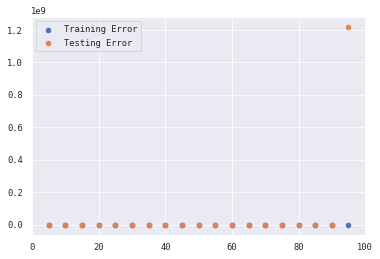

In [316]:
import random
random.seed(11)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

We will go with this model now! 

## V. Model Interpretation

In [317]:
len(final_result)

83

Based on our model, there are several ways to increase the house price:

* Improve the house condition
* Renovate and get a better grade
* Increase the size of the living space

If someone is looking to invest in a property, location is one the most important factors to consider. Try to buy houses in the area (zip code) that is growing, not declining. And pay attention to the grade, condition of the house. If possible, buy a house with waterfront.